# Customer Booking Behaviour Analysis

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [136]:
df=pd.read_csv(r"C:\Users\dinyz\Internships\Forage_Virtual_Intern_British_Airways\Task-2\customer_booking.csv",encoding='latin-1')
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [73]:
df.shape

(50000, 14)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [75]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [76]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

<AxesSubplot:>

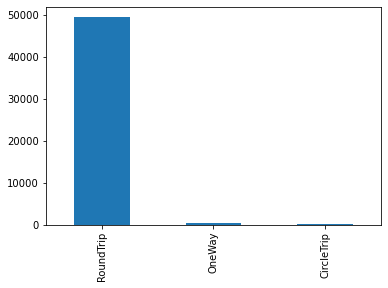

In [77]:
df['trip_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

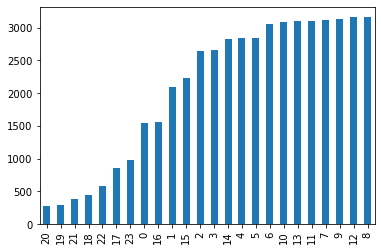

In [78]:
df['flight_hour'].value_counts().sort_values(ascending=True).plot(kind='bar')

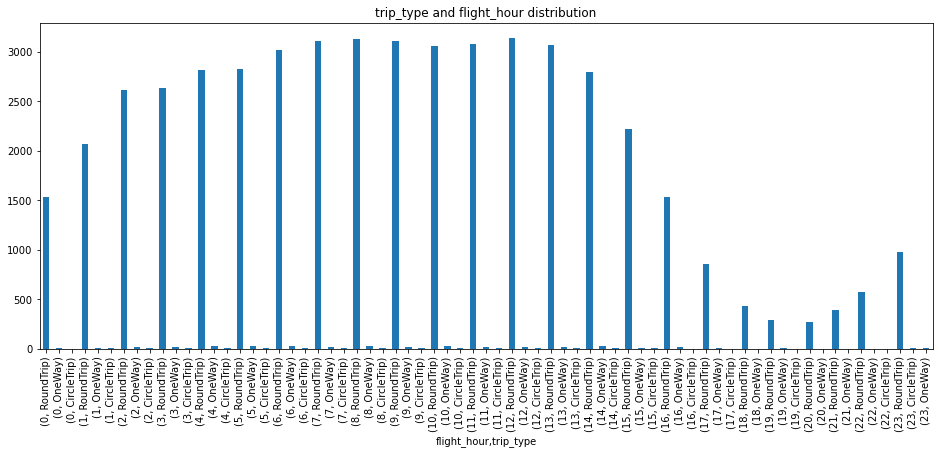

In [79]:
trip_flight_hour=df.groupby('flight_hour')['trip_type'].value_counts()
plt.figure(figsize=(16,6))
trip_flight_hour.plot.bar()
plt.title('trip_type and flight_hour distribution')
plt.show()

<AxesSubplot:>

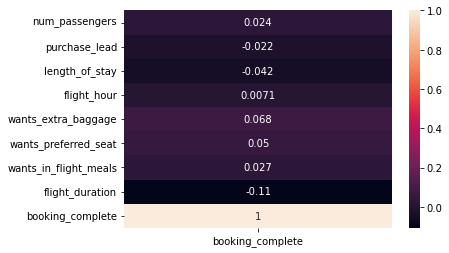

In [80]:
# How targeted variable affects other variables
corr=df.corr()[['booking_complete']]
sns.heatmap(corr,annot=True)

# Seperating dependent and independent features

In [81]:
x=df.drop('booking_complete',axis=1)
y=df['booking_complete']

In [82]:
# changing object dtype to int type
for i in x.select_dtypes('object'):
    x[i],_=x[i].factorize()

In [83]:
x.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

# Feature Selection

# Mutual Information

In [84]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)

In [85]:
mi=pd.Series(mi,name='MI Scores',index=x.columns)
mi=mi.sort_values(ascending=False)

In [86]:
mi

route                    0.054013
booking_origin           0.048502
flight_duration          0.016989
wants_extra_baggage      0.011784
length_of_stay           0.008584
wants_in_flight_meals    0.003788
wants_preferred_seat     0.003672
trip_type                0.003105
num_passengers           0.002212
flight_day               0.001858
sales_channel            0.000000
purchase_lead            0.000000
flight_hour              0.000000
Name: MI Scores, dtype: float64

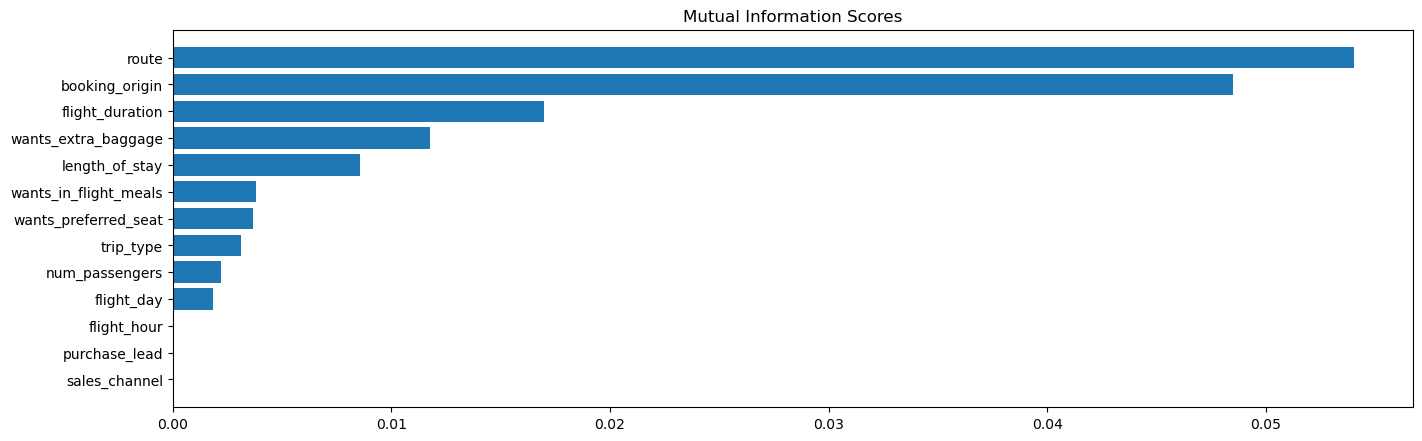

In [87]:
def plot_mi(data):
    data=data.sort_values(ascending=True)
    width=np.arange(len(data))
    ticks=list(data.index)
    plt.barh(width,data)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Scores')
    
plt.figure(dpi=100,figsize=(16,5))
plot_mi(mi)

# Correlation Filter

In [88]:
x.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
num_passengers,1.000000,-0.002457,-0.002398,0.212606,-0.115850,0.015607,-0.007096,-0.039191,-0.128836,0.120404,0.028544,0.022943,-0.063169
sales_channel,-0.002457,1.000000,-0.020929,-0.013399,-0.060352,0.022375,-0.000780,-0.013403,-0.060382,-0.054254,0.032943,-0.022235,-0.038629
trip_type,-0.002398,-0.020929,1.000000,0.007691,-0.011779,0.003194,0.004133,0.011905,0.008017,0.010716,-0.007786,-0.014732,0.043418
purchase_lead,0.212606,-0.013399,0.007691,1.000000,-0.076560,0.035973,0.011917,-0.104828,-0.077272,-0.022207,-0.004499,-0.022653,0.067866
length_of_stay,-0.115850,-0.060352,-0.011779,-0.076560,1.000000,-0.024872,0.000791,-0.004616,0.112914,0.176757,0.032264,0.098828,0.141181
flight_hour,0.015607,0.022375,0.003194,0.035973,-0.024872,1.000000,0.000455,-0.016650,-0.015756,-0.011434,0.012171,0.013014,-0.002101
flight_day,-0.007096,-0.000780,0.004133,0.011917,0.000791,0.000455,1.000000,-0.010172,-0.003214,-0.003761,-0.009210,-0.001845,-0.001400
route,-0.039191,-0.013403,0.011905,-0.104828,-0.004616,-0.016650,-0.010172,1.000000,0.195515,0.022008,0.012699,-0.014119,-0.150993
booking_origin,-0.128836,-0.060382,0.008017,-0.077272,0.112914,-0.015756,-0.003214,0.195515,1.000000,0.051515,0.043292,0.085755,0.160598
wants_extra_baggage,0.120404,-0.054254,0.010716,-0.022207,0.176757,-0.011434,-0.003761,0.022008,0.051515,1.000000,0.207669,0.216470,0.057054


<AxesSubplot:>

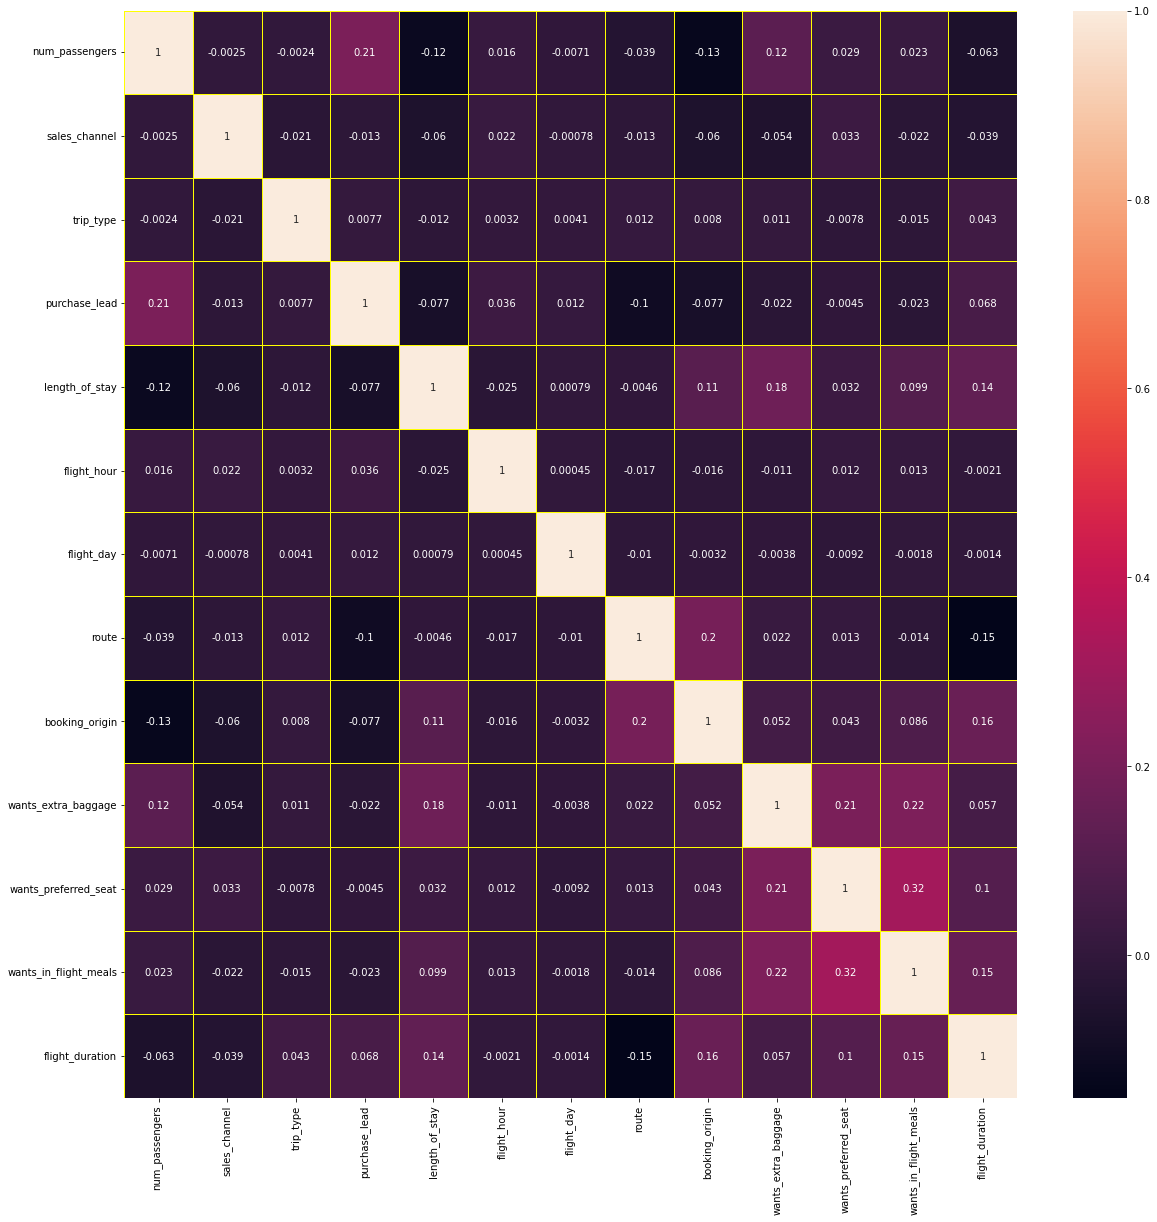

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True,linewidths =1,linecolor = "yellow")

# Variance method

It is an approach where all features are removed whose variance doesn’t meet the specific threshold. By default, this method removes features having zero variance.

In [90]:
# from feature_selection import filter_method as ft
# quasi_constant_feature=ft.constant_feature_detect(data=x,threshold=0.9)

In [91]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0.9)
feature_zero_variance=vt.fit(x)
feature_zero_variance=vt.get_support()

In [92]:
feature_zero_variance

array([ True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True])

In [93]:
# Features need to be removed - becoz variance is zero for these features
x.columns[:][vt.get_support()]

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'flight_duration'],
      dtype='object')

# Chi-square filter

In [94]:
from sklearn.feature_selection import SelectKBest, chi2
chi_2=SelectKBest(chi2,k=4)
chi_square=chi_2.fit_transform(x,y)
chi_square=chi_2.get_support()

In [95]:
# Features need to be selected which K=2 means top 2 features
x.columns[:][chi_2.get_support()]

Index(['purchase_lead', 'length_of_stay', 'route', 'booking_origin'], dtype='object')

In [96]:
#pip install -U feature-engine

# 2. Wrapper Method

# 2.1 Forward Selection

In [97]:
#pip install mlxtend

In [98]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
sfs=sfs(lr, k_features=4, forward=True, verbose=1)
sfs=sfs.fit(x,y)

Features: 4/4

In [99]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)

['sales_channel', 'booking_origin', 'wants_extra_baggage', 'flight_duration']


# 2.2 Backward Elimination

In [100]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
sfs=sfs(lr, k_features=4, forward=False, verbose=1)

In [101]:
sfs=sfs.fit(x,y)

Features: 4/44

In [102]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)

['sales_channel', 'booking_origin', 'wants_extra_baggage', 'flight_duration']


# Splitting the train test split

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,_y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [104]:
x_train.shape,x_test.shape

((37500, 13), (12500, 13))

# Scaling the data

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [106]:
scaler=scaler.fit(x_train,x_test)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [107]:
x_train_scaled

array([[0.125     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48240166],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.80952381],
       [0.25      , 1.        , 0.        , ..., 0.        , 1.        ,
        0.86128364],
       ...,
       [0.125     , 1.        , 0.        , ..., 0.        , 0.        ,
        0.60041408],
       [0.375     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.86128364],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.13664596]])

# Model Creation-1 Random Forest Classifier with top 6 features

In [108]:
# Including only top 6 features
features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
x= df[features]

# Creating one-hot encoding
x=pd.get_dummies(x,columns=features)

# Seperating x and y [dependent and independent features]
x=x
y=y

# Splitting the x and y for train and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Scaling the data [x_train,x_test]
scaler=scaler.fit(x_train,x_test)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [109]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier
model_1=RandomForestClassifier(random_state=1)
model_1.fit(x_train_scaled,y_train)
predict=model_1.predict(x_test_scaled)

In [110]:
# Model evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print('Training model accuracy:{:.3f}'.format(model_1.score(x_train_scaled,y_train)))
print('Test model accuracy:{:.3f}'.format(model_1.score(x_test_scaled,y_test)))
print('predicted model accuracy:{:.3f}'.format(accuracy_score(y_test,predict)))
print('predicted model roc_auc_score:{:.3f}'.format(roc_auc_score(y_test,predict)))

Training model accuracy:0.928
Test model accuracy:0.841
predicted model accuracy:0.841
predicted model roc_auc_score:0.566


# Model-2 RandomForestClassifier with all features

In [111]:
# Creating dataset split definition
def dataset(x,y):
    train_full_x, val_x, train_full_y, val_y = train_test_split(x, y,test_size=0.2,random_state = 0)
    x_train, x_test, y_train, y_test = train_test_split(train_full_x, train_full_y, test_size=0.25,random_state = 0)
    return (x_train, x_test, y_train, y_test)

In [112]:
# creating scaling definition
from sklearn.preprocessing import MinMaxScaler

def scale(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    return x

In [125]:
# Including only top 6 features
x= df.drop('booking_complete',axis=1)
y=df['booking_complete']

# Creating one-hot encoding
x=pd.get_dummies(x)

# Scaling the data [x_train,x_test]
x=scale(x)

# Splitting the x and y for train and test split
x_train,x_test,y_train,y_test=dataset(x,y)

In [127]:
# Model created
model_2= RandomForestClassifier(random_state=1)
model_2.fit(x_train, y_train)
preds=model_2.predict(x_test)

In [130]:
# Evaluating the model
print('Training model accuracy:{:.3f}'.format(model_2.score(x_train,y_train)))
print('Test model accuracy:{:.3f}'.format(model_2.score(x_test,y_test)))
print('predicted model accuracy:{:.3f}'.format(accuracy_score(y_test,preds)))
print('predicted model roc_auc_score:{:.3f}'.format(roc_auc_score(y_test,preds)))

Training model accuracy:1.000
Test model accuracy:0.847
predicted model accuracy:0.847
predicted model roc_auc_score:0.546


# model 3 : XGB classifier with top 6 features

In [132]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.Installing collected packages: xgboost



In [133]:
from xgboost import XGBClassifier
features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete    

X_train,X_test,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.99
AUC score:  0.522893565925117


# Model 4 XGB with all features

In [135]:

X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.85000000000001
AUC score:  0.5411094546070015
